<a href="https://colab.research.google.com/github/MadsNL/AMLMain/blob/Mads/AML_IceCores_unzip_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! gdown --id 1paSsYReykEVDPX8pA2SUf7Gr7Lptq-PX
! unzip Insoluables_TrainingData26May2022.zip
!git clone https://github.com/MadsNL/AMLpackages.git
import sys
sys.path.append('/content/AMLpackages/')
from load_data import training_set, not_training_set
from Models import make_autoencoder
!pip install pyyaml h5py 
!pip install umap-learn

Streaming output truncated to the last 5000 lines.
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5532.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5533.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5534.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5535.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5536.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5537.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5538.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5539.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_554.png  
 extracting: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5540.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5541.png  
  inflating: Insoluables_T

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
#import umap
import seaborn as sb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [ ]:
sup_path = '/content/Insoluables_TrainingData/train/'
sup_im_path = '/content/Insoluables_TrainingData/train/'
sup_df = pd.read_csv(sup_path+'train.csv')
train_df, test_df = train_test_split(sup_df, test_size=0.2, random_state=37)
train = training_set(train_df, sup_im_path)
test = training_set(test_df, sup_im_path)

In [ ]:

x_train = []
x_train_labs = []
index_count = 0
for i in range(10000):
  im, lab, _ = train.__getitem__(index_count)
  index_count += 1
  x_train.append(im)
  x_train_labs.append(lab)
x_train = np.array(x_train)
x_train_labs = np.array(x_train_labs)

In [ ]:
! gdown --id 1vmtn2HUFFspLehTO-9HNCnphSdiZGez3
! gdown --id 1vOWLDeQh2EEyH2J3VH5XZHhTLqMqAjkV
! unzip autoencoder_128.zip
! unzip encoder_128.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1vmtn2HUFFspLehTO-9HNCnphSdiZGez3
To: /content/encoder_128.zip
100% 78.0M/78.0M [00:00<00:00, 78.4MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1vOWLDeQh2EEyH2J3VH5XZHhTLqMqAjkV
To: /content/autoencoder_128.zip
100% 123M/123M [00:03<00:00, 36.9MB/s]
Archive:  autoencoder_128.zip
   creating: autoencoder_128/
   creating: autoencoder_128/variables/
  inflating: autoencoder_128/variables/variables.data-00000-of-00001  
  inflating: autoencoder_128/variables/variables.index  
  inflatin

In [ ]:
autoencoder_loaded = keras.models.load_model('autoencoder_128')

In [ ]:
preds = autoencoder_loaded.predict(x_train)

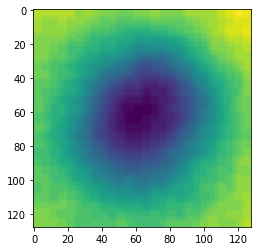

In [ ]:
plt.imshow(x_train[0])

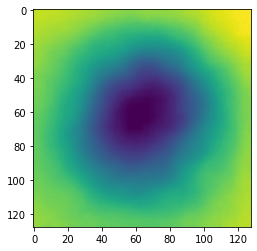

In [ ]:
plt.imshow(preds[0][:,:,0])

In [ ]:
encoder_loaded = keras.models.load_model('encoder_128')

In [ ]:
encoder_preds = encoder_loaded.predict(x_train)

In [ ]:
tree = lgb.LGBMClassifier(objective='multiclass')
tree.fit(encoder_preds, x_train_labs)

LGBMClassifier(objective='multiclass')

In [ ]:
x_train = []
x_train_labs = []
index_count = 10000
for i in range(1000):
  im, lab, _ = train.__getitem__(index_count)
  index_count += 1
  x_train.append(im)
  x_train_labs.append(lab)
x_train = np.array(x_train)
x_train_labs = np.array(x_train_labs)

In [ ]:
encoder_preds = encoder_loaded.predict(x_train)
tree_preds = tree.predict(encoder_preds)
print(sum(x_train_labs==tree_preds)/len(tree_preds))

0.792
